# Lab 1: Getting started with NerworkX 

This notebook contains a mix of tutorials based on William Mattingly's *Introduction to Python for Digital Humanities* (2022) and Filippo Menczer, Santo Fortunato and Clayton A. Davis' *A First Course in Network Science* (2020) adapted by Katarzyna Anna Kapitan for the needs of ENC NA HN class. 

*Note: The notebook runs on Python 3.10 so go ahead and create an venv with this version of Python to make sure everything runs smoothly.*


In this course we will frequently use `matplotlib` and `NetworkX` packages. 

 - `matplotlib` (a comprehensive library for creating static, animated, and interactive visualizations; https://matplotlib.org/stable/; Hunter JD (2007) "Matplotlib: A 2D Graphics Environment", *Computing in Science & Engineering*, vol. 9, no. 3, pp. 90-95)
 - `NetworkX` (a package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks;  https://networkx.org;  Hagberg A, Schult DA, Swart PJ (2008), “Exploring network structure, dynamics, and function using NetworkX”, in *Proceedings of the 7th Python in Science Conference (SciPy2008)*, Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15).

Go ahead and install these packages locally with conda or pip. 

Now import `pyplot` form `matplotlib` as `plt` and `networkx` as `nx`

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

## Creating the Network: Nodes and Links 

We will start by defining some relationships to work with. 
Let's assume that we are going to analyse relationships within a group of 6 students, Fred, George, Harry, Rita, Ginny, Tom. 
They are all students of the same university, but in different MA programmes, so only some of them know each other because they are together in some elective classes.

- Fred and George take Math together; 
- Harry and Rita take French together; 
- Fred and Ginny take English together; 
- Tom and Ginny take Philosophy together;
- Harry and Ginny take Introduction to DH together.  

In our network the nodes are the individual students and the links are the relationships between them (understood as them taking the same class).   


We will create a list of lists called `relationships`. 
Ech sub-list will describe one relationship between two people. 
For now we don't care which class they take together. 
*Remember: Lists are used to store multiple items in a single variable and are created using square brackets.*

In [2]:
relationships = [
    ["Fred", "George"],
    ["Harry", "Rita"],
    ["Fred", "Ginny"],
    ["Tom", "Ginny"],
    ["Harry", "Ginny"]
    ]
relationships

[['Fred', 'George'],
 ['Harry', 'Rita'],
 ['Fred', 'Ginny'],
 ['Tom', 'Ginny'],
 ['Harry', 'Ginny']]

In order to begin working with this data in NetworkX, we need to first populate a NetworkX Graph class. We will call this variable G.

In [3]:

G = nx.Graph()

Once created, we can check that our G is empty by printing it. 



In [4]:
print(G)

Graph with 0 nodes and 0 edges


The response above should be "Graph with 0 nodes and 0 edges"

*Note: Remember what I said in class, that if it's a graph than it made up of vertices which are connected by edges and if it is a real network we talk about nodes and links? Well, you see that the usage in networkX doesn't follow this, the package describes graphs, but uses nodes and edges.*

Otherwise, we can use `number_of_nodes()`and `number_of_edges` to check it. 


*Note: Remember for future reference: N, represents the number of components in the system (number of nodes/vertices).* 
*L, represents the total number of interactions between the nodes (number of links/edges).*



In [5]:

print('N:', G.number_of_nodes())

N: 0


In [6]:
print ('L:', G.number_of_edges())

L: 0


Now we populate the graph with relationships one by one using a loop. 
We will  use the `.add_edge()` method from the `Graph` class. This will take two mandatory arguments: 1) the source node and 2) the destination node. The source and the destination are important in certain circumstances when force is applied in a graph. This controls how the map is displayed visually.

In [7]:
for relationship in relationships:
    source, dest = relationship
    G.add_edge(source, dest)

Now we can check whether our data was added to the `Graph`. We should have 6 nodes and 5 edges.

In [8]:
print('My graph has', G.number_of_nodes(), 'nodes and', G.number_of_edges(), 'edges!')

My graph has 6 nodes and 5 edges!


With all our edges added into our Graph `G`, we can now plot it with `Matplotlib`. 

We will use the `draw_networkx()` function to create a plot in memory. This will take one argument, the graph of nodes we wish to visualize. Next, we will use plt.show() to display the map. Since we are working within a Jupyter Notebook, this will be displayed as an output.

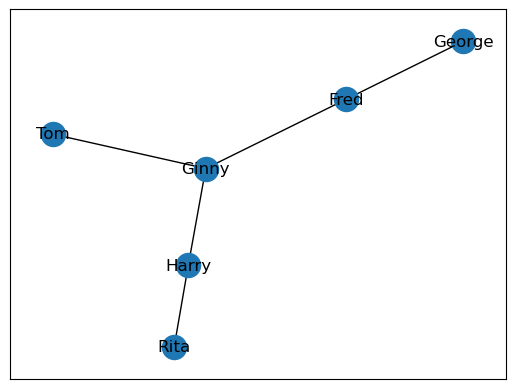

In [9]:
nx.draw_networkx(G)
plt.show()

Sometimes, you do not want to use a loop to add each edge individually. Then you can use `add_edges_from()` method to add a list of edges all at once. This method will expect a list of relationships.

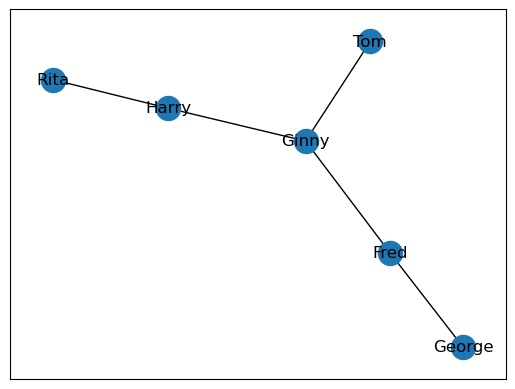

In [10]:
G = nx.Graph()
G.add_edges_from(relationships)
nx.draw_networkx(G)
plt.show()

## Example 2: Saving the visualisation as an image

To save our visualisation of our Graph as an image we will use `pyplot` from `matplotlib` (our `plt`). 
More info: https://matplotlib.org/stable/tutorials/pyplot.html 
We can save it as a PNG file by using `savefig`.

*Remember: We will have to draw our network again with NetworkX and then call the `plt.savefig`*

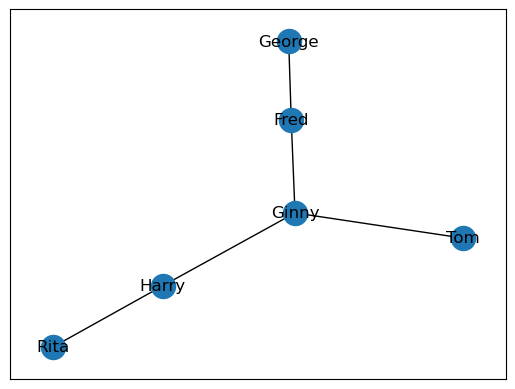

In [11]:
nx.draw_networkx(G)
plt.savefig("myGraph.png", format="PNG")

Check whether there is a new file called myGraph.png in the same folder where you've saved this notebook. 
If so, congratulations on creating your first visualisation! 

## Example 3: Saving information about the network
If we want to store info about our network and/or reuse it in the future, we should save it in some other format than an image. 

One of the formats used in network science is pajek net format.  
Pajek NET is a text-based file format for storing graphs.

To create a pajek net file from NetworkX (our `nx`) we use `write_pajek` which takes as arguments our graph, the name under which we want to save the file, and the encoding: 

*We recommend to specify the encoding of your file as UTF-8*

In [12]:
nx.write_pajek(G, "myGraph.net", encoding='UTF-8')

Check whether the is a new file called `myGraph.net` in the same folder where you've saved this notebook. 
If so, congratulations on saving your first graph! 

## Example 4: Opening saved graphs 
Now let's test whether we can actually read the file we've just created and load all the information we've gathered so far about our network. 

For that we will create a new graph, called `myNewGraph` and use the NetworkX (our `nx`) function `read_pajek` to load all the info stored in `myGraph.net` and then we will use the NetworkX function `draw_network` to display our graph.

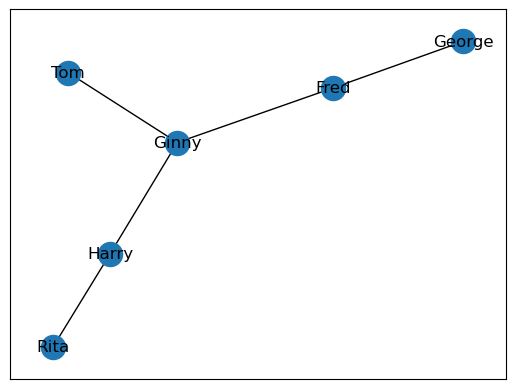

In [13]:
myNewGraph = nx.read_pajek("myGraph.net", encoding='UTF-8')
nx.draw_networkx(myNewGraph)

Congratulations on loading and displaying in your first network! 

## Example 5: Adding edges to the network

Now, let's assume we want to add information about a new relationship, i.e. a new student joining one of the classes. 
Let's say that Kate joined the math class. 

We remember that our network represented the following information

- Fred and George take Math together; 
- Harry and Rita take French together; 
- Fred and Ginny take English together; 
- Tom and Ginny take Philosophy together;
- Harry and Ginny take Introduction to DH together.  

Now we need to create new links between Kate and Fred and Kate and George. 

We can use `add_edge` method to do that.  



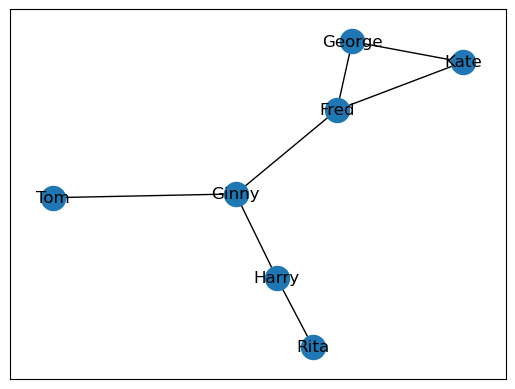

In [14]:
myNewGraph.add_edge("Kate", "Fred")
myNewGraph.add_edge("Kate", "George")
nx.draw_networkx(myNewGraph)

Let's add three more students, who take another class together. Let's say it's theater and the students are Leonardo, Brad and Margot. 

We can add more than one new relationship by creating a new list of relationships and additing it with `add_edges_from` method.

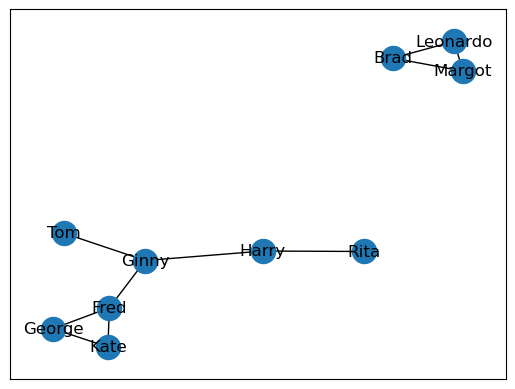

In [15]:
additionalRels = [
["Margot", "Leonardo"],
["Margot", "Brad"],
["Brad", "Leonardo"],
]
myNewGraph.add_edges_from(additionalRels)
nx.draw_networkx(myNewGraph)

Now we can check whether there is a difference in our network regarding the number of nodes and edges. 

In [16]:
print('My new graph has', 
      myNewGraph.number_of_nodes(), 'nodes and' , myNewGraph.number_of_edges(), 'edges', 'while my old graph had', G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges.", )

My new graph has 10 nodes and 10 edges while my old graph had 6 nodes and 5 edges.


In [17]:
nx.write_pajek(myNewGraph, "myNewGraph.net", encoding='UTF-8')

## Exercise
Now reproduce the workflow above to create a graph representing the Actor Network illustrated on the slide. 
For now let's ignore in which movies the actors were together and focus on the links.

- Create a list
- Populate Graph
- Check Number of Nodes (N)
- Check Number of Edges (L)
- Display the Graph
- Save the Graph as an image file called `actorGraph.png`
- Save the Graph as a pajek net file called `actorGraph.net`